In [6]:
# 載入資料

import pandas as pd

names=['sepal_length','sepal_width','petal_length','petal_width','class']

df=pd.read_csv('iris.data.csv',header=None,names=names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


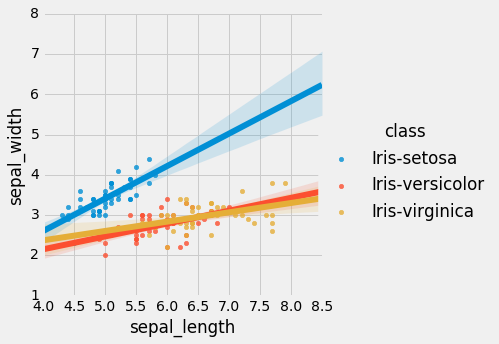

In [12]:
#判斷class和其他特徵的關係

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')
sns.lmplot('sepal_length','sepal_width',  #x與y
           data=df,       #資料來自於
           fit_reg=True,  #回歸線是否出現
           hue='class')   #類別、顏色分別

In [13]:
#將資料分為test和train
import numpy as np


from sklearn.cross_validation import train_test_split
X=df.iloc[:,:-1].values
y=df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
#使用K-NN

from sklearn.neighbors import KNeighborsClassifier


# k=3的 knn函式
knn=KNeighborsClassifier(n_neighbors=3)

#用.fit將訓練值帶入
knn.fit(x_train,y_train)

#用.predict將測試值帶入
pred=knn.predict(x_test)

#比對knn預測值的正確度
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.97999999999999998

In [20]:
#交叉驗證
#把原始資料按不同的方法分，計算不同部分的平均得分。
from sklearn.model_selection import cross_val_score  #評分資料準確度

scores = cross_val_score(knn , x_train , y_train ,
                         cv=10 ,#將資料分成10組
                         scoring='accuracy')#顯示準確度高不高的方法（越高越好）
print(scores)
print(scores.mean())

[ 0.91666667  1.          1.          0.72727273  0.9         1.          1.
  1.          1.          0.88888889]
0.943282828283


# 調整參數&評估結果

7


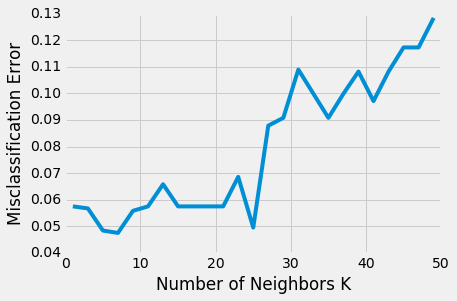

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#1-50所有奇數
k=[x for x in range(1,50) if x%2!=0]

cv_scores=[]

for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn , x_train , y_train ,
                         cv=10 ,#將資料分成10組
                         scoring='accuracy')
    cv_scores.append(scores.mean())#每一次將 k=i 的十個平均分數記錄下來

#計算MSE值：均方誤差(預測值和實際觀測值間差的平方的均值)
MSE=[1-x for x in cv_scores]  #誤差率：1-準確率

#決定最佳的 k值
optimal_k = k[MSE.index(min(MSE))]  #MSE最小、準確度最高！
print(optimal_k)


plt.plot(k,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# 資料預處理

In [22]:
import pandas as pd
df=pd.read_csv('data.csv')
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [23]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [24]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [25]:
df.dropna(axis=0) #刪除有遺漏值的列(axis=0  x軸)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [26]:
df.dropna(axis=1) ##刪除有遺漏值的行(axis=1  y軸)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [28]:
df.dropna(subset=['C']) #C在各列中是否有缺失值

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [29]:
##用平均值

from sklearn.preprocessing import Imputer

##定義imputer的方式與參數
imr=Imputer(missing_values='NaN',strategy='mean',axis=0)
##strategy：mean / median / most_frequent


#值帶入
imr=imr.fit(df.values)

#轉換並帶入新值
imputed_data=imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

# 處理非數值型數據

In [65]:
import pandas as pd

df=pd.DataFrame([['green','M',10.1,'class1'],['red','L',13.5,'class2'],['blue','XL',15.3,'class1']])

df.columns=['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [66]:
#定義對應字典mapping dictionary

size_mapping={'XL':3,'L':2,'M':1}
df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [34]:
#轉回原始字串

inv_size_mapping={v:k for k,v in size_mapping.items()}
df['size']=df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [67]:
#類別標籤編碼

from sklearn.preprocessing import LabelEncoder


#定義函式
class_le=LabelEncoder()

#用.fit_transform()帶入需要轉變的標籤與值
y = class_le.fit_transform(df['classlabel'].values)
y

df['classlabel']=class_le.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [49]:
#轉回原始標籤

df['classlabel']=class_le.inverse_transform(y)  ##沒有成功XD
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [68]:
#對名目進行編碼

#叫出所有標題 與 值
x=df[['color','size','price']].values

#定義函式
color_le=LabelEncoder()

#將表格某行用.fit_transform 帶入某行 讓類別自行定義成數字
x[:,0]=color_le.fit_transform(x[:,0])  #df['color'].values 也可以
x


df['color']=color_le.fit_transform(x[:,0])
df

,color,size,price,classlabel
0,1,1,10.1,0
1,2,2,13.5,1
2,0,3,15.3,0


### 對類別特徵進行編碼

In [76]:
#將每個值轉為一個新的虛擬特徵

#【方法一】 - 【OneHotEncoder】
from sklearn.preprocessing import OneHotEncoder

#定義函式
ohe=OneHotEncoder(categorical_features=[0])##第0行類別

#為每個類別新增一個欄位，用 0/1 表示是否
data_ohe=ohe.fit_transform(x).toarray()
data_ohe
#pd.DataFrame(data_ohe)


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [86]:
#利用pandas

pd.get_dummies(df['color'])

,0,1,2
0,0,1,0
1,0,0,1
2,1,0,0


In [88]:
#刪除相關特徵行

pd.get_dummies(df['color'],drop_first=True)


,1,2
0,1,0
1,0,1
2,0,0
